# Part 1: Binomial Distribution

### Example
A multiple choice test contains 20 questions with answer choices A, B, C, and D. Only one answer choice to each question represents a correct answer. Find the probability that a student will answer exactly 6 questions correct if he makes random guesses on all 20 questions.


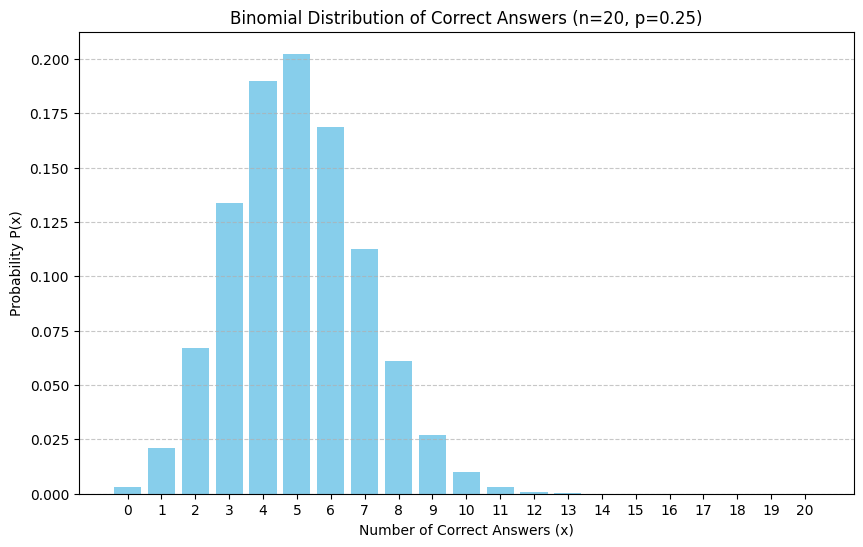

In [2]:
import matplotlib.pyplot as plt
import math

# Function to calculate combinations (nCk)
def combinations(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Function to calculate binomial probability
def binomial_probability(n, k, p):
    return combinations(n, k) * (p**k) * ((1 - p)**(n - k))

n_questions = 20
p_correct = 0.25

probabilities = []
for k in range(n_questions + 1):
    prob = binomial_probability(n_questions, k, p_correct)
    probabilities.append(prob)

k_values = list(range(n_questions + 1))

plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities, color='skyblue')
plt.title('Binomial Distribution of Correct Answers (n=20, p=0.25)')
plt.xlabel('Number of Correct Answers (x)')
plt.ylabel('Probability P(x)')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Part 2: Bayesian Probability 

##Formula:
-P(A∣B) = Posterior probability (probability of A given B)
-P(B∣A) = Likelihood (probability of B given A)

-𝑃(𝐴)P(A) = Prior probability of A

-P(B) = Marginal probability of B (normalizing factor)

-A be "the email is spam"
-B be "the words in the email"

In [8]:
from collections import defaultdict
import math

# Training dataset
emails = [
    ("Buy cheap meds now", "spam"),
    ("Limited offer just for you", "spam"),
    ("Meeting tomorrow at 10am", "not_spam"),
    ("Project deadline extended", "not_spam"),
    (" No meeting today", "not_spam"),
]

# Changes a word to lower case and splits
def word_splitter(text):
    return text.lower().split()

# Count words
word_counts = {
    "spam": defaultdict(int),
    "not_spam": defaultdict(int)
}
class_counts = defaultdict(int)

for message, label in emails:
    class_counts[label] += 1
    for word in word_splitter(message):
        word_counts[label][word] += 1

# Total number of messages
total_messages = sum(class_counts.values())

# Calculate prior probability of spam or not_spam
priors = {
    label: count / total_messages
    for label, count in class_counts.items()
}

# Calculate conditional probabilities with Laplace smoothing
def word_prob(word, label):
    return (word_counts[label][word] + 1) / (sum(word_counts[label].values()) + len(word_counts[label]))

# Modified Naive Bayes classifier with detailed logs
def predict_verbose(message):
    words = word_splitter(message)
    scores = {}

    print(f"\n📩 Predicting message: \"{message}\"\nWords: {words}\n")

    for label in class_counts:
        print(f"🔍 Label: '{label}'")

        prior = priors[label]
        log_prob = math.log(prior)
        print(f"  ➤ Prior P({label}) = {prior:.4f}")
        print(f"  ➤ log(Prior) = {log_prob:.4f}")

        for word in words:
            cond_prob = word_prob(word, label)
            log_word_prob = math.log(cond_prob)
            log_prob += log_word_prob
            print(f"    🔹 P('{word}'|{label}) = {cond_prob:.4f} → log = {log_word_prob:.4f}")

        scores[label] = log_prob
        print(f"  ✅ Total log score for '{label}': {log_prob:.4f}\n")

    # Convert log scores to real probabilities
    max_log = max(scores.values())
    exp_scores = {label: math.exp(scores[label] - max_log) for label in scores}
    total = sum(exp_scores.values())
    probs = {label: exp_scores[label] / total for label in exp_scores}

    for label in probs:
        print(f"🔢 P({label} | message) = {probs[label]:.4f}")

    prediction = max(probs, key=probs.get)
    print(f"\n🏁 Final prediction: {prediction.upper()}")
    return prediction

# Test email
test_email = "We have a cheap offer now"
predict_verbose(test_email)




📩 Predicting message: "We have a cheap offer now"
Words: ['we', 'have', 'a', 'cheap', 'offer', 'now']

🔍 Label: 'spam'
  ➤ Prior P(spam) = 0.4000
  ➤ log(Prior) = -0.9163
    🔹 P('we'|spam) = 0.0526 → log = -2.9444
    🔹 P('have'|spam) = 0.0500 → log = -2.9957
    🔹 P('a'|spam) = 0.0476 → log = -3.0445
    🔹 P('cheap'|spam) = 0.0952 → log = -2.3514
    🔹 P('offer'|spam) = 0.0952 → log = -2.3514
    🔹 P('now'|spam) = 0.0952 → log = -2.3514
  ✅ Total log score for 'spam': -16.9551

🔍 Label: 'not_spam'
  ➤ Prior P(not_spam) = 0.6000
  ➤ log(Prior) = -0.5108
    🔹 P('we'|not_spam) = 0.0500 → log = -2.9957
    🔹 P('have'|not_spam) = 0.0476 → log = -3.0445
    🔹 P('a'|not_spam) = 0.0455 → log = -3.0910
    🔹 P('cheap'|not_spam) = 0.0435 → log = -3.1355
    🔹 P('offer'|not_spam) = 0.0417 → log = -3.1781
    🔹 P('now'|not_spam) = 0.0400 → log = -3.2189
  ✅ Total log score for 'not_spam': -19.1745

🔢 P(spam | message) = 0.9020
🔢 P(not_spam | message) = 0.0980

🏁 Final prediction: SPAM


'spam'


![alt text](<CamScanner ⁨6-22-25 18.57⁩_1.jpg>)

![alt text](<CamScanner ⁨6-22-25 18.57⁩_1-1.jpg>)

![alt text](<CamScanner ⁨6-22-25 18.57⁩_3.jpg>)

![alt text](<CamScanner ⁨6-22-25 18.57⁩_4.jpg>)

![alt text](<CamScanner ⁨6-22-25 18.57⁩_5.jpg>)

#  Part 4: Gradient Descent in Code 

*In this section we are going to convert the manual calculation computed in part 3 into Pyhon code using SciPy.*

### Import libraries:
- numpy: Used for  for numerical computations.
- matplotlib.pyplot:Used for creating visualizations and plotting data.
-  scipy.optimize.approx_fprime:Computes numerically gradients


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime

### Initialization of Dataset and Parameters

1. Initial m=-1
2. Initial b=1
3. learning rate=0.1
4. Given points: (1,3) and (3,6)

In [ ]:
# Parameters
m=-1
b=1
alpha = 000.1  # Learning rate

# Dataset
X = np.array([1, 3]) 
Y = np.array([3, 6])  

### Mean Squared Error Cost Function
It helps us measure how large the prediction error is.

### Components:
1. len(x): count how many data point we have in x which in our case is 2 as x ha 2 elements ([1,3])
2. prediction :
3. error : difference between prediction and true y value.
4. cost: Mean Squared Error


In [ ]:
def cost_function(m, b, X, Y):
    N = len(X)
    predictions = m * X + b
    error = predictions - Y
    cost = (1 / N) * np.sum(error ** 2)
    return cost

### Gradient Calculation:

We define a function to compute the gradients of the cost function with respect to parameters `m`  and `b` .  
These gradients tell us how to adjust `m` and `b` in order to reduce the error.

### Components:

- GoM: tells us how to update m
- GoB: tells us how to update b



In [ ]:
# Gradient Calculation
def gradients(m, b, X, Y):
    N = len(X)
    predictions = m * X + b
    error = predictions - Y
    GoM = (2 / N) * np.sum(error * X)
    GoB = (2 / N) * np.sum(error)
    return GoM,GoB

In [ ]:
# Perform Gradient Descent
max_iterations =4


In [ ]:
for i in range(max_iterations):
    current_cost = cost_function(m, b, X, Y)
    GoM, GoB = gradients(m, b, X, Y)
    
    m = m - alpha * GoM
    b = b - alpha * GoB
    
    print(f"Iteration {i+1}: Cost={current_cost:.4f}, m={m:.4f}, b={b:.4f}")


Iteration 1: Cost=36.5000, m=1.7000, b=2.1000
Iteration 2: Cost=1.0400, m=1.2600, b=1.9000
Iteration 3: Cost=0.0640, m=1.3400, b=1.9160
Iteration 4: Cost=0.0348, m=1.3336, b=1.8968
